In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LOAD THE DATASET


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from IPython.display import display
train = pd.read_csv('/content/drive/MyDrive/training_v2.csv')
test = pd.read_csv('/content/drive/MyDrive/unlabeled.csv')
submission=pd.read_csv('/content/drive/MyDrive/solution_template (1).csv')


# Check the first few rows of each dataset
print("Training Dataset:\n", train.head())
print("\nUnlabeled Dataset:\n", test.head())


Training Dataset:
    encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0             

In [ ]:
# Check the first few rows of each dataset
print("Training Dataset:")
display(train.head())

print("\nUnlabeled Dataset:")
display(test.head())


Training Dataset:


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma



Unlabeled Dataset:


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,7,101458,86,NaN,66.0,32.518596,1,African American,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,8,48067,163,NaN,64.0,20.798520,0,Caucasian,M,182.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
4,10,25865,59,NaN,56.0,NaN,0,Caucasian,M,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [ ]:
# Get the number of rows and columns in the DataFrame
rows, columns = train.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 91713
Number of columns: 186


In [ ]:
# Get the number of rows and columns in the DataFrame
rows, columns = test.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 39308
Number of columns: 186


In [ ]:
# Display all column names
print(train.columns.tolist())


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

In [ ]:
# Display all column names
print(test.columns.tolist())


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

# Data Visualization

**Distribution of the target variable in the training dataset**


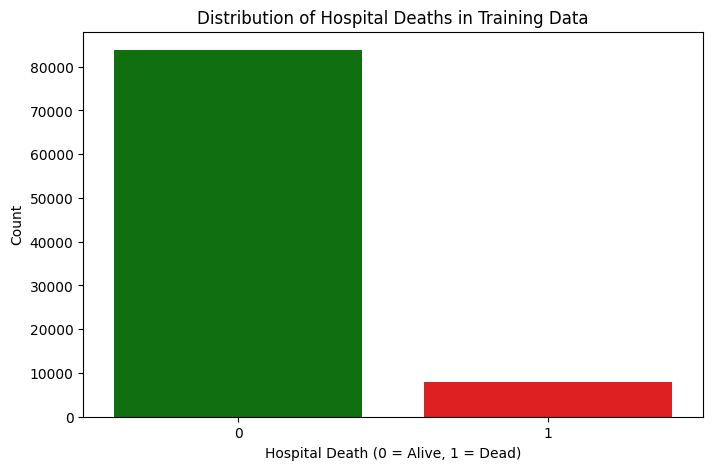

In [ ]:
# 1. Check the distribution of the target variable in the training dataset
plt.figure(figsize=(8, 5))
sns.countplot(x='hospital_death', hue='hospital_death', data=train, palette=['green', 'red'], dodge=False, legend=False)
plt.title('Distribution of Hospital Deaths in Training Data')
plt.xlabel('Hospital Death (0 = Alive, 1 = Dead)')
plt.ylabel('Count')
plt.show()


**Relationship between age and survivability**

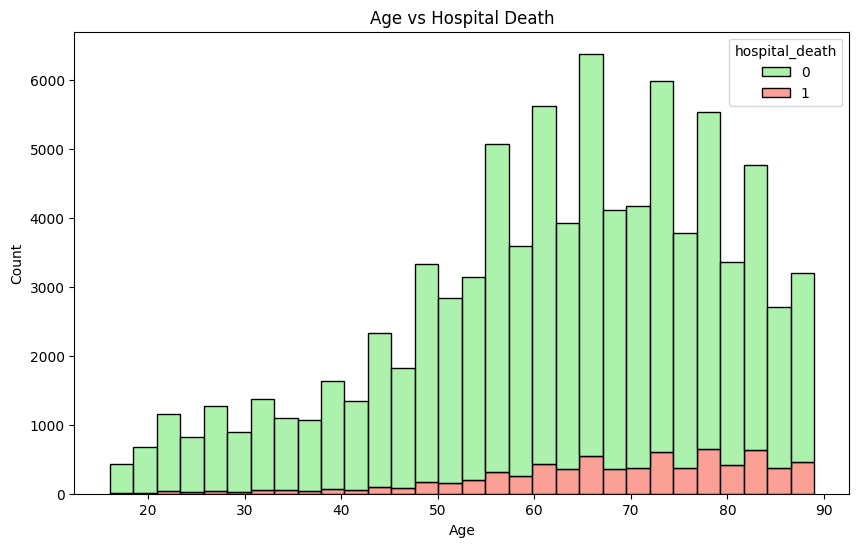

In [ ]:
# 2. Age vs Hospital Death
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='age', hue='hospital_death', multiple='stack', bins=30, palette=['lightgreen', 'salmon'])

plt.title('Age vs Hospital Death')
plt.xlabel('Age')

plt.show()

Patients aged above 60 have a higher risk of death.

**Relationship between Gender and survivability**

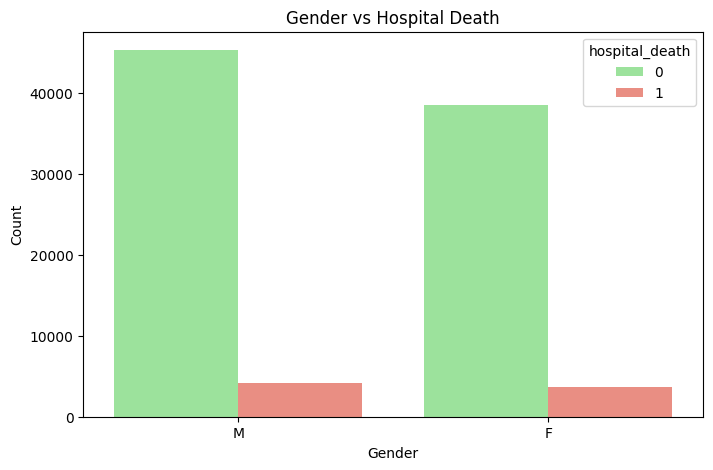

In [ ]:
# 3. Gender vs Hospital Death
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='hospital_death', data=train, palette=['lightgreen', 'salmon'])
plt.title('Gender vs Hospital Death')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Gender does not seem to have any significant effect on survivability.

**Relationship between Ethnicity and survivability**


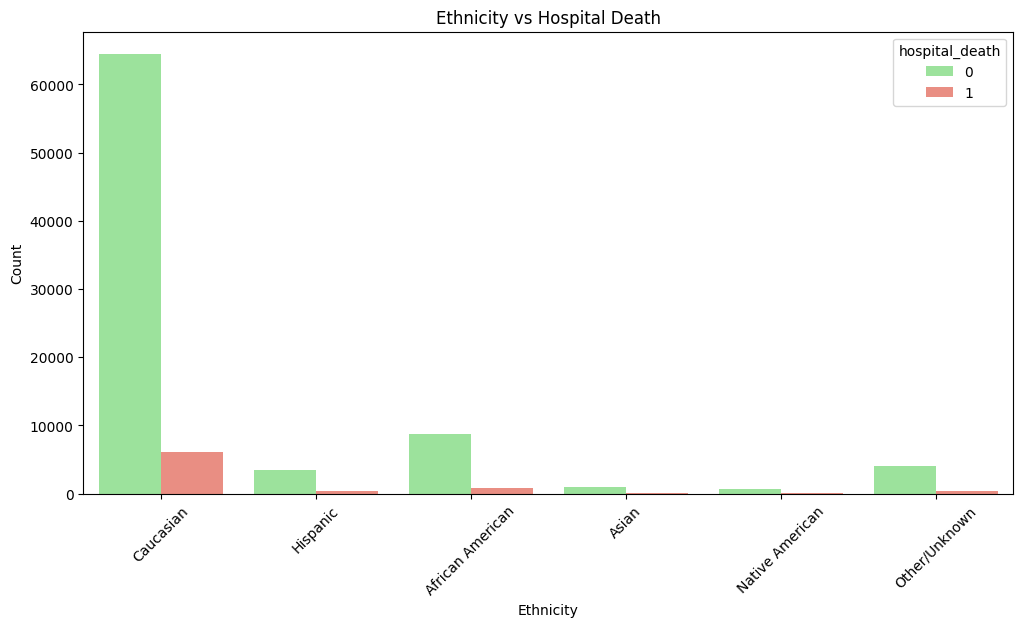

In [ ]:
# 4. Race vs Hospital Death
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', hue='hospital_death', data=train, palette=['lightgreen', 'salmon'])
plt.xticks(rotation=45)
plt.title('Ethnicity vs Hospital Death')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

This dataset has more cases of Caucasians than other races, which reflects the general population, but Hispanics have the highest ratio of deaths over survival.

**Relationship between BMI and survivability**

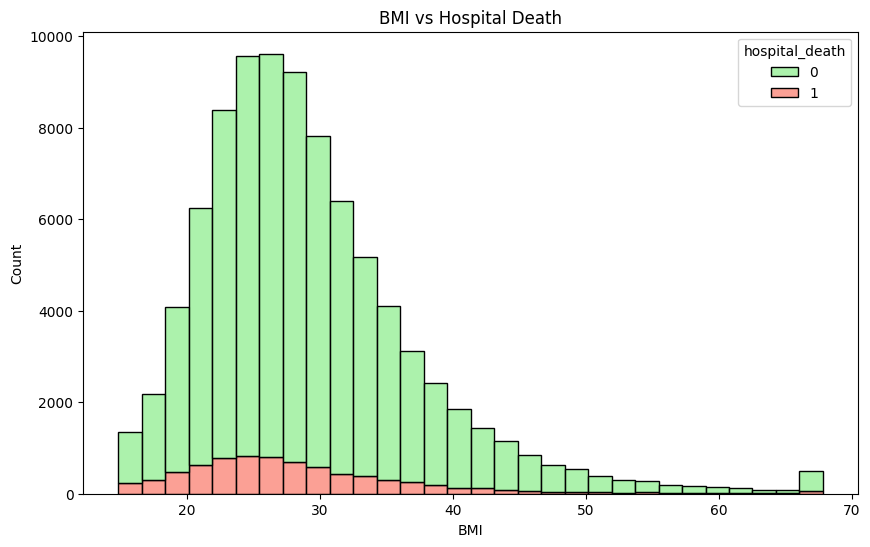

In [ ]:
# 5. BMI vs Hospital Death
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='bmi', hue='hospital_death', multiple='stack', bins=30, palette=['lightgreen', 'salmon'])
plt.title('BMI vs Hospital Death')
plt.xlabel('BMI')
plt.show()

The risk of death is higher for a BMI lower than 25.

**Relationship between BMI and survivability**

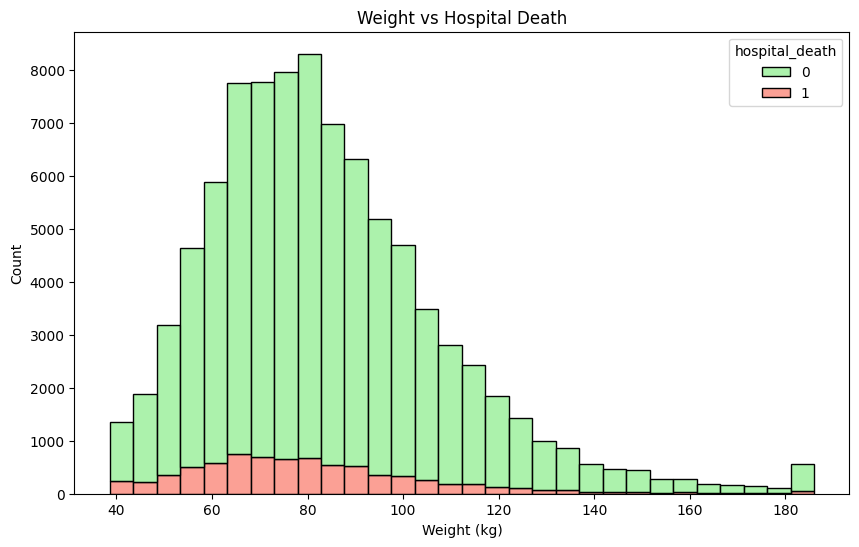

In [ ]:
# 6. Weight vs Hospital Death: Higher survival chance in patients weighing between 80-150 kg
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='weight', hue='hospital_death', multiple='stack', bins=30, palette=['lightgreen', 'salmon'])
plt.title('Weight vs Hospital Death')
plt.xlabel('Weight (kg)')
plt.show()

Patients weighing between 80kg and 150kg seem to have a higher chance of survival.

**Relationship between pre-ICU admission days and survivability**

<ipython-input-14-636d8c808080>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='hospital_death', y='pre_icu_los_days', palette=['lightgreen', 'salmon'])


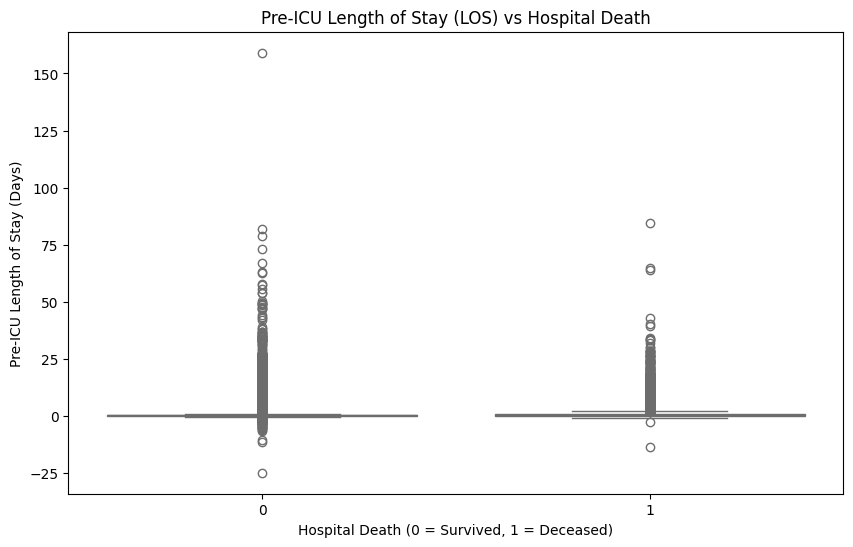

In [ ]:
# Pre-ICU Length of Stay vs Hospital Death
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='hospital_death', y='pre_icu_los_days', palette=['lightgreen', 'salmon'])
plt.title('Pre-ICU Length of Stay (LOS) vs Hospital Death')
plt.xlabel('Hospital Death (0 = Survived, 1 = Deceased)')
plt.ylabel('Pre-ICU Length of Stay (Days)')
plt.show()






Patients with a total of 5 or more days between hospital admission and unit admission have a higher risk of death.

**ICU type and survivability**

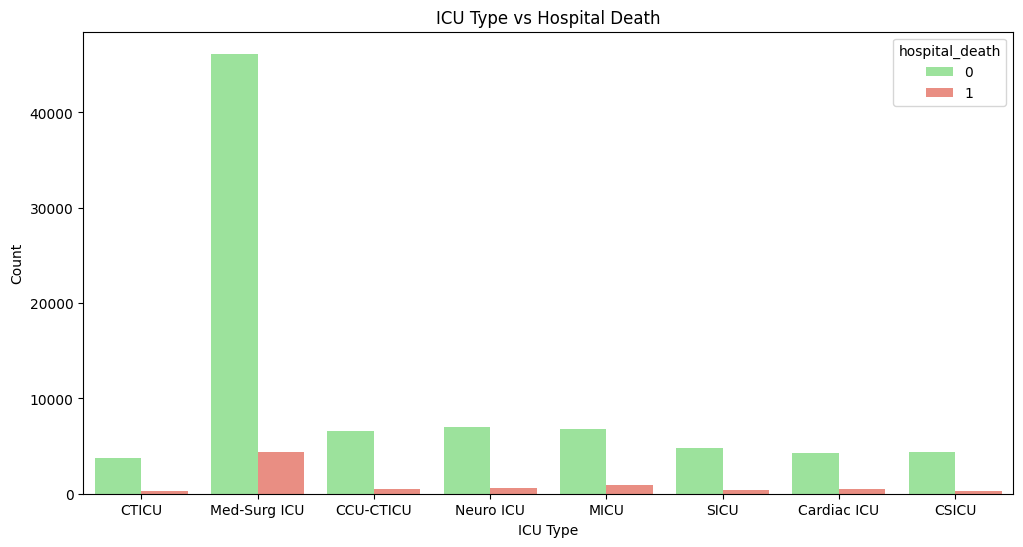

In [ ]:
# ICU Type with the highest death-to-survival ratio
plt.figure(figsize=(12, 6))
sns.countplot(x='icu_type', hue='hospital_death', data=train, palette=['lightgreen', 'salmon'])
plt.title('ICU Type vs Hospital Death')
plt.xlabel('ICU Type')
plt.ylabel('Count')
plt.show()

The highest numbers of survivals and deaths are in the Medical Surgery ICU, but the highest death-to-survival ratio is in the MICU, followed by the Cardiac ICU.


**Hospital admission source and hospital death**

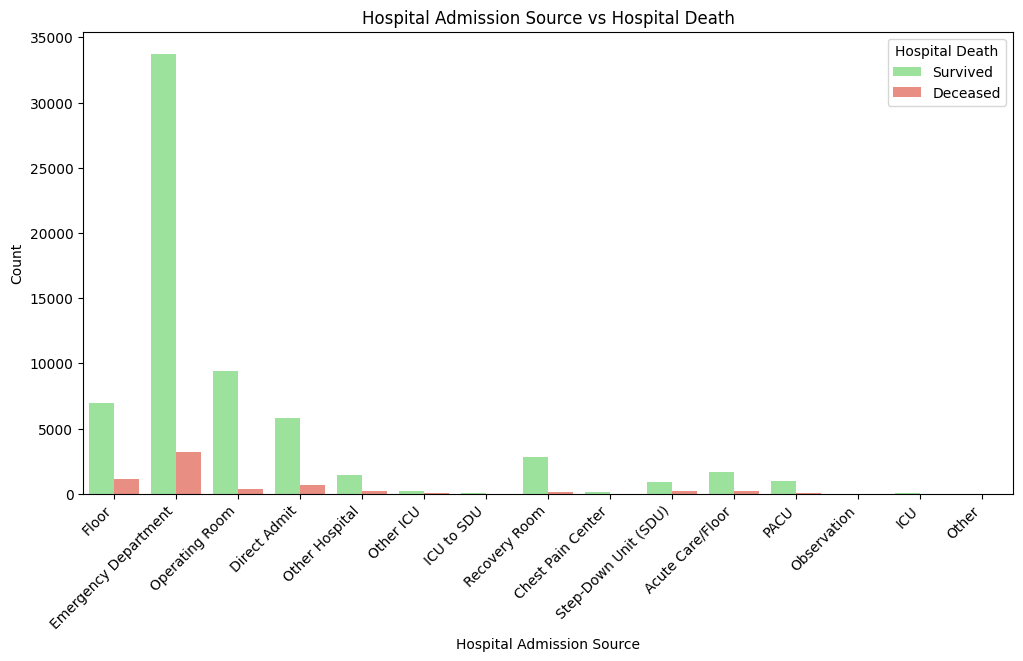

In [ ]:
# Count Plot: Hospital Admission Source vs Hospital Death
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='hospital_admit_source', hue='hospital_death', palette=['lightgreen', 'salmon'])
plt.title('Hospital Admission Source vs Hospital Death')
plt.xlabel('Hospital Admission Source')
plt.ylabel('Count')
plt.legend(title='Hospital Death', labels=['Survived', 'Deceased'])
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.show()



# DATA PREPROCESSING


In [ ]:
# Drop 'encounter_id' and 'patient_id' columns from the training dataset
train = train.drop('encounter_id', axis=1)
train = train.drop('patient_id', axis=1)

# Drop 'encounter_id' and 'patient_id' columns from the test dataset
test = test.drop('encounter_id', axis=1)
test = test.drop('patient_id', axis=1)



In [ ]:
# Replace spaces with underscores in column names for both train and test datasets
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

# Check the result to ensure column names are updated
print(train.columns)
print(test.columns)


Index(['hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=184)
Index(['hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=184)


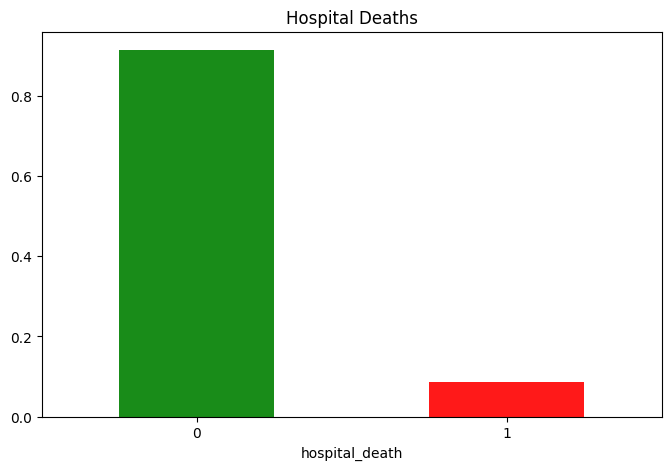

In [ ]:
# Create a new figure with specified size
fig = plt.figure(figsize=(8, 5))

# Normalize the value counts of 'hospital_death' and plot as a bar chart
train['hospital_death'].value_counts(normalize=True).plot(
    kind='bar',
    color=['green', 'red'],  # Colors for the bars
    alpha=0.9,  # Transparency of the bars
    rot=0  # No rotation of x-axis labels
)

# Set the title of the plot
plt.title('Hospital Deaths')

# Display the plot
plt.show()



In [ ]:
null_precent_threshold = 0.6  # Define the threshold for acceptable missing data

# Calculate total and percentage of missing values for each column in the training dataset
total = train.isnull().sum().sort_values(ascending=False)  # Total missing values
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)  # Percentage of missing values

# Combine total and percentage into a single DataFrame
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Identify columns with missing values below the specified threshold
null_acceptable_idx = missing.drop(missing[missing['Percent'] > null_precent_threshold].index).index

# Filter both training and test datasets to keep only the acceptable columns
train = train[null_acceptable_idx]
test = test[null_acceptable_idx]


In [ ]:
null_acceptable_idx
train

,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,...,gender,elective_surgery,hospital_death,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_post_operative,hospital_id
0,2.3,0.4,0.4,NaN,NaN,2.3,2.3,NaN,14.10,37.5,...,M,0,0,92,admit,CTICU,0.541667,0,0,118
1,NaN,0.5,0.5,145.0,143.0,1.6,1.6,NaN,12.70,36.3,...,F,0,0,90,admit,Med-Surg ICU,0.927778,0,0,81
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,...,F,0,0,93,admit,Med-Surg ICU,0.000694,0,0,118
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,34.8,...,F,1,0,92,admit,CTICU,0.000694,0,1,118
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,M,0,0,91,admit,Med-Surg ICU,0.073611,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,NaN,NaN,NaN,208.0,208.0,NaN,NaN,NaN,NaN,38.2,...,M,0,0,927,admit,Cardiac ICU,0.298611,0,0,30
91709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22,36.1,...,F,0,0,925,admit,Med-Surg ICU,0.120139,0,0,121
91710,2.9,NaN,NaN,NaN,NaN,2.8,3.1,NaN,17.55,36.6,...,M,0,0,908,admit,Med-Surg ICU,0.046528,0,0,195
91711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,F,0,0,922,admit,Med-Surg ICU,0.081944,0,0,66


In [ ]:
null_acceptable_idx
test

,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,...,gender,elective_surgery,hospital_death,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_post_operative,hospital_id
0,3.7,NaN,NaN,NaN,NaN,3.7,3.7,1121.1264,4.7,36.6,...,M,0,NaN,1105,admit,Neuro ICU,0.104167,0,0,7
1,NaN,0.6,0.6,NaN,NaN,3.1,3.1,843.4368,NaN,36.6,...,F,1,NaN,1043,admit,Med-Surg ICU,0.230556,0,1,178
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1728.0000,14.8,NaN,...,M,1,NaN,1035,admit,CCU-CTICU,0.140972,0,1,86
3,1.9,0.8,0.8,122.0,122.0,1.9,1.9,1434.4128,9.7,38.0,...,M,0,NaN,1078,admit,Med-Surg ICU,0.002083,0,0,163
4,NaN,0.4,0.4,NaN,NaN,3.5,3.5,NaN,14.5,36.0,...,M,0,NaN,1012,admit,Neuro ICU,0.004861,0,1,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2705.1840,NaN,36.1,...,F,1,NaN,1082,admit,Neuro ICU,0.411111,0,1,163
39304,NaN,NaN,NaN,349.0,349.0,NaN,NaN,1728.4320,12.0,36.7,...,M,0,NaN,1029,admit,Cardiac ICU,0.218056,0,0,86
39305,2.0,1.0,1.0,NaN,NaN,2.0,2.0,NaN,32.8,NaN,...,M,0,NaN,977,admit,Med-Surg ICU,0.003472,0,0,152
39306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4849.3728,7.6,37.1,...,M,0,NaN,968,admit,Cardiac ICU,0.147917,0,0,164


In [ ]:
lst = []  # Initialize an empty list to store filled values information

# Loop through each column in the train DataFrame that has object data type (categorical columns)
for col in train.select_dtypes(include=['object']).columns:
    # Get the most common value (mode) in the column
    most_common = train[col].value_counts().idxmax()

    # Fill missing values in the column with the most common value
    train[col] = train[col].fillna(most_common)

    # Append the column name and the filled value to the list
    lst.append({'col': col, 'filled value': most_common})

# Convert the list to a DataFrame to summarize the filled values
pd.DataFrame(lst)



,col,filled value
0,hospital_admit_source,Emergency Department
1,apache_3j_bodysystem,Cardiovascular
2,apache_2_bodysystem,Cardiovascular
3,ethnicity,Caucasian
4,icu_admit_source,Accident & Emergency
5,gender,M
6,icu_stay_type,admit
7,icu_type,Med-Surg ICU


In [ ]:
# Check for remaining missing values in the categorical columns
missing_counts = train.select_dtypes(include=['object']).isnull().sum()
print("Remaining missing values in categorical columns:")
print(missing_counts[missing_counts > 0])  # Print columns with missing values

Remaining missing values in categorical columns:
Series([], dtype: int64)


In [ ]:
print(train['gender'].fillna(most_common).isnull().sum())

0


In [ ]:
lst = []  # Initialize an empty list to store filled values information for the test DataFrame

# Loop through each column in the test DataFrame that has object data type (categorical columns)
for col in test.select_dtypes(include=['object']).columns:
    # Get the most common value (mode) in the column
    most_common = test[col].value_counts().idxmax()

    # Fill missing values in the column with the most common value
    test[col] = test[col].fillna(most_common)

    # Append the column name and the filled value to the list
    lst.append({'col': col, 'filled value': most_common})
# Convert the list to a DataFrame to summarize the filled values
pd.DataFrame(lst)


,col,filled value
0,hospital_admit_source,Emergency Department
1,apache_3j_bodysystem,Cardiovascular
2,apache_2_bodysystem,Cardiovascular
3,ethnicity,Caucasian
4,icu_admit_source,Accident & Emergency
5,gender,M
6,icu_stay_type,admit
7,icu_type,Med-Surg ICU


In [ ]:
print(test['gender'].fillna(most_common).isnull().sum())

0


In [ ]:
lst = []  # Initialize an empty list to store filled values information

# Loop through each column in the train DataFrame that has numeric data types
for col in train.select_dtypes(include=['float64', 'int64']).columns:
    mean = train[col].mean()  # Calculate the mean of the column
    train[col] = train[col].fillna(mean)  # Fill missing values with the mean
    lst.append({'col': col, 'filled value': mean})  # Store column name and filled value

# Convert the list to a DataFrame to summarize the filled values
pd.DataFrame(lst)


,col,filled value
0,albumin_apache,2.902968
1,d1_bilirubin_max,1.137308
2,d1_bilirubin_min,1.067815
3,h1_glucose_max,167.985117
4,h1_glucose_min,159.222742
...,...,...
105,icu_id,508.357692
106,pre_icu_los_days,0.835766
107,readmission_status,0.000000
108,apache_post_operative,0.201106


In [ ]:
lst = []  # Initialize an empty list to store filled values information

# Loop through each numeric column in the test DataFrame
for col in test.select_dtypes(include=['float64', 'int64']).columns:
    if col == 'hospital_death':  # Skip the 'hospital_death' column
        continue
    mean = test[col].mean()  # Calculate the mean of the column
    test[col] = test[col].fillna(mean)  # Fill missing values with the mean
    lst.append({'col': col, 'filled value': mean})  # Store column name and filled value

# Convert the list to a DataFrame to summarize the filled values
pd.DataFrame(lst)


,col,filled value
0,albumin_apache,2.843310
1,d1_bilirubin_max,1.323397
2,d1_bilirubin_min,1.238383
3,h1_glucose_max,167.292480
4,h1_glucose_min,158.448107
...,...,...
104,icu_id,1020.677267
105,pre_icu_los_days,0.829561
106,readmission_status,0.000000
107,apache_post_operative,0.216572


In [ ]:
# Check for null values in the train DataFrame
print('no nulls detected in train' if ~train.isnull().sum().sort_values(ascending=False).any() else '**there is nulls in train**')

# Check for null values in the test DataFrame, excluding the 'hospital_death' column
print('no nulls detected in test' if ~test.drop('hospital_death', axis=1).isnull().sum().sort_values(ascending=False).any() else '**there is nulls in test**')


no nulls detected in train
no nulls detected in test


In [ ]:
train

,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,...,gender,elective_surgery,hospital_death,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_post_operative,hospital_id
0,2.300000,0.400000,0.400000,167.985117,159.222742,2.300000,2.300000,1738.276831,14.100000,37.500000,...,M,0,0,92,admit,CTICU,0.541667,0,0,118
1,2.902968,0.500000,0.500000,145.000000,143.000000,1.600000,1.600000,1738.276831,12.700000,36.300000,...,F,0,0,90,admit,Med-Surg ICU,0.927778,0,0,81
2,2.902968,1.137308,1.067815,167.985117,159.222742,2.900007,2.968332,1738.276831,12.133333,36.700000,...,F,0,0,93,admit,Med-Surg ICU,0.000694,0,0,118
3,2.902968,1.137308,1.067815,167.985117,159.222742,2.900007,2.968332,1738.276831,8.000000,34.800000,...,F,1,0,92,admit,CTICU,0.000694,0,1,118
4,2.902968,1.137308,1.067815,167.985117,159.222742,2.900007,2.968332,1738.276831,12.133333,36.607651,...,M,0,0,91,admit,Med-Surg ICU,0.073611,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,2.902968,1.137308,1.067815,208.000000,208.000000,2.900007,2.968332,1738.276831,12.133333,38.200000,...,M,0,0,927,admit,Cardiac ICU,0.298611,0,0,30
91709,2.902968,1.137308,1.067815,167.985117,159.222742,2.900007,2.968332,1738.276831,4.220000,36.100000,...,F,0,0,925,admit,Med-Surg ICU,0.120139,0,0,121
91710,2.900000,1.137308,1.067815,167.985117,159.222742,2.800000,3.100000,1738.276831,17.550000,36.600000,...,M,0,0,908,admit,Med-Surg ICU,0.046528,0,0,195
91711,2.902968,1.137308,1.067815,167.985117,159.222742,2.900007,2.968332,1738.276831,12.133333,36.607651,...,F,0,0,922,admit,Med-Surg ICU,0.081944,0,0,66


In [ ]:
test


,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,...,gender,elective_surgery,hospital_death,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_post_operative,hospital_id
0,3.70000,1.323397,1.238383,167.29248,158.448107,3.700000,3.700000,1121.126400,4.700000,36.600000,...,M,0,NaN,1105,admit,Neuro ICU,0.104167,0,0,7
1,2.84331,0.600000,0.600000,167.29248,158.448107,3.100000,3.100000,843.436800,12.310268,36.600000,...,F,1,NaN,1043,admit,Med-Surg ICU,0.230556,0,1,178
2,2.84331,1.323397,1.238383,167.29248,158.448107,2.839883,2.913061,1728.000000,14.800000,36.628501,...,M,1,NaN,1035,admit,CCU-CTICU,0.140972,0,1,86
3,1.90000,0.800000,0.800000,122.00000,122.000000,1.900000,1.900000,1434.412800,9.700000,38.000000,...,M,0,NaN,1078,admit,Med-Surg ICU,0.002083,0,0,163
4,2.84331,0.400000,0.400000,167.29248,158.448107,3.500000,3.500000,1910.924935,14.500000,36.000000,...,M,0,NaN,1012,admit,Neuro ICU,0.004861,0,1,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39303,2.84331,1.323397,1.238383,167.29248,158.448107,2.839883,2.913061,2705.184000,12.310268,36.100000,...,F,1,NaN,1082,admit,Neuro ICU,0.411111,0,1,163
39304,2.84331,1.323397,1.238383,349.00000,349.000000,2.839883,2.913061,1728.432000,12.000000,36.700000,...,M,0,NaN,1029,admit,Cardiac ICU,0.218056,0,0,86
39305,2.00000,1.000000,1.000000,167.29248,158.448107,2.000000,2.000000,1910.924935,32.800000,36.628501,...,M,0,NaN,977,admit,Med-Surg ICU,0.003472,0,0,152
39306,2.84331,1.323397,1.238383,167.29248,158.448107,2.839883,2.913061,4849.372800,7.600000,37.100000,...,M,0,NaN,968,admit,Cardiac ICU,0.147917,0,0,164


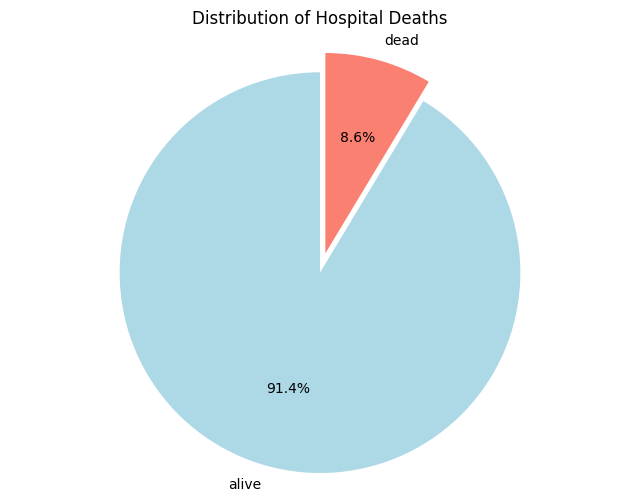

In [ ]:
import matplotlib.pyplot as plt

# Create a pie chart for the 'hospital_death' column
plt.figure(figsize=(8, 6))
plt.pie(
    train['hospital_death'].value_counts(),  # Values for the pie chart
    autopct='%1.1f%%',  # Format to show percentage
    labels=['alive', 'dead'],  # Labels for the slices
    colors=['lightblue', 'salmon'],
    startangle=90,
    explode=(0.1, 0)
)

# Add a title
plt.title('Distribution of Hospital Deaths')
plt.axis('equal')
plt.show()  # Display the pie chart


In [ ]:
train['hospital_death'].value_counts()

,count
hospital_death,
0,83798
1,7915


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler with a specified sampling strategy
ros = RandomOverSampler(sampling_strategy=0.6)

# Fit and resample the training data
x, y = ros.fit_resample(train.drop('hospital_death', axis=1), train['hospital_death'])

# Concatenate the resampled features and target back into a single DataFrame
train = pd.concat([x, y], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in test.select_dtypes(include=['object']).columns:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

train.select_dtypes(include=['object']).columns, test.select_dtypes(include=['object']).columns

(Index([], dtype='object'), Index([], dtype='object'))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Loop through each column in the test DataFrame that has object data type (categorical columns)
for col in test.select_dtypes(include=['object']).columns:
    # Fit and transform the training column
    train[col] = le.fit_transform(train[col])

    # Fit and transform the test column
    test[col] = le.fit_transform(test[col])

# Display the categorical columns in train and test DataFrames
print(train.select_dtypes(include=['object']).columns)
print(test.select_dtypes(include=['object']).columns)


Index([], dtype='object')
Index([], dtype='object')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Scale features for PCA
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train.drop('hospital_death', axis=1))
y = train['hospital_death']

# Apply PCA for dimensionality reduction
n_components = 65  # Number of components to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Reshape for RNN input
timesteps = 1
X_pca_reshaped = np.reshape(X_pca, (X_pca.shape[0], timesteps, n_components))

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca_reshaped, y, test_size=0.2, random_state=42)

# Define RNN Model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Model
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

# Preparing Test Data
X_test_scaled = scaler.transform(test.drop('hospital_death', axis=1))
X_test_pca = pca.transform(X_test_scaled)
X_test_pca_reshaped = np.reshape(X_test_pca, (X_test_pca.shape[0], timesteps, n_components))

# Prediction on Unlabeled Data
test_predictions = (model.predict(X_test_pca_reshaped) > 0.5).astype(int)

# Save predictions to a new CSV file
test['hospital_death'] = test_predictions
test[['hospital_death']].to_csv('unlabeled_predictions2.csv', index=False)
print("Predictions saved to 'unlabeled_predictions2.csv'")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.7801 - loss: 0.4595 - val_accuracy: 0.8011 - val_loss: 0.4351
Epoch 2/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8007 - loss: 0.4339 - val_accuracy: 0.8051 - val_loss: 0.4276
Epoch 3/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7994 - loss: 0.4268 - val_accuracy: 0.8086 - val_loss: 0.4169
Epoch 4/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8046 - loss: 0.4211 - val_accuracy: 0.8150 - val_loss: 0.4104
Epoch 5/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8081 - loss: 0.4153 - val_accuracy: 0.8137 - val_loss: 0.4066
Epoch 6/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8089 - loss: 0.4123 - val_accuracy: 0.8172 - val_loss: 0.4052
Epoch 7/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8103 - loss: 0.4110 - val_accuracy: 0.8182 - val_loss: 0.4007
Epoch 8/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8105 -

In [ ]:
import pandas as pd
predictions = pd.read_csv('unlabeled_predictions2.csv')
print(predictions['hospital_death'].value_counts())


hospital_death
0    32772
1     6536
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure the model is trained and X_val, y_val are defined
if 'model' not in locals():
    raise NameError("The model is not defined. Please define and train the model before running this code.")

# Predict on the validation set
val_predictions_prob = model.predict(X_val)
val_predictions = (val_predictions_prob > 0.5).astype(int)

# Calculate metrics
roc_auc = roc_auc_score(y_val, val_predictions_prob)  # Use probabilities for AUC-ROC
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Print results
print(f"Validation AUC-ROC: {roc_auc:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)






838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation AUC-ROC: 0.9293
Validation Precision: 0.8102
Validation Recall: 0.8157
Validation F1-Score: 0.8129
Confusion Matrix:
[[14825  1924]
 [ 1855  8212]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Scale features for PCA
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train.drop('hospital_death', axis=1))
y = train['hospital_death']

# Apply PCA for dimensionality reduction
n_components = 65  # Number of components to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Reshape for LSTM input
timesteps = 1
X_pca_reshaped = np.reshape(X_pca, (X_pca.shape[0], timesteps, n_components))

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca_reshaped, y, test_size=0.2, random_state=42)

# Define LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Model
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

# Preparing Test Data
X_test_scaled = scaler.transform(test.drop('hospital_death', axis=1))
X_test_pca = pca.transform(X_test_scaled)
X_test_pca_reshaped = np.reshape(X_test_pca, (X_test_pca.shape[0], timesteps, n_components))

# Prediction on Unlabeled Data
test_predictions = (model.predict(X_test_pca_reshaped) > 0.5).astype(int)

# Save predictions to a new CSV file
test['hospital_death'] = test_predictions
test[['hospital_death']].to_csv('unlabeled_predictions1.csv', index=False)
print("Predictions saved to 'unlabeled_predictions1.csv'")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7878 - loss: 0.4589 - val_accuracy: 0.8144 - val_loss: 0.4076
Epoch 2/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8160 - loss: 0.4004 - val_accuracy: 0.8211 - val_loss: 0.3949
Epoch 3/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8224 - loss: 0.3889 - val_accuracy: 0.8277 - val_loss: 0.3834
Epoch 4/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8270 - loss: 0.3798 - val_accuracy: 0.8286 - val_loss: 0.3772
Epoch 5/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8312 - loss: 0.3703 - val_accuracy: 0.8320 - val_loss: 0.3715
Epoch 6/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8352 - loss: 0.3644 - val_accuracy: 0.8340 - val_loss: 0.3663
Epoch 7/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8375 - loss: 0.3578 - val_accuracy: 0.8366 - val_loss: 0.3630
Epoch 8/100
3352/3352 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8392 -

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure the model is trained and X_val, y_val are defined
if 'model' not in locals():
    raise NameError("The model is not defined. Please define and train the model before running this code.")

# Predict on the validation set
val_predictions_prob = model.predict(X_val)
val_predictions = (val_predictions_prob > 0.5).astype(int)

# Calculate metrics
roc_auc = roc_auc_score(y_val, val_predictions_prob)  # Use probabilities for AUC-ROC
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Print results
print(f"Validation AUC-ROC: {roc_auc:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Validation AUC-ROC: 0.9739
Validation Precision: 0.8577
Validation Recall: 0.9814
Validation F1-Score: 0.9154
Confusion Matrix:
[[15110  1639]
 [  187  9880]]


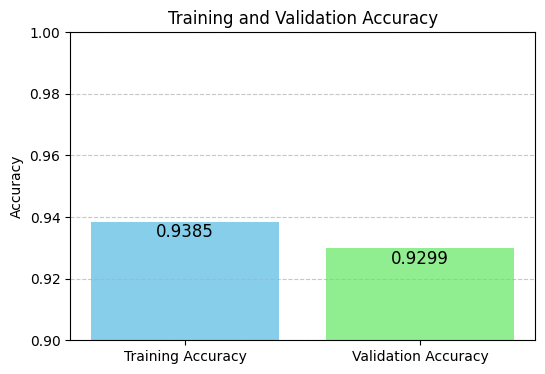

In [ ]:
import matplotlib.pyplot as plt

# Replace these values with the actual accuracies
train_accuracy = 0.9385
val_accuracy = 0.9299

# Create a bar chart
labels = ['Training Accuracy', 'Validation Accuracy']
values = [train_accuracy, val_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.ylim(0.9, 1)  # Adjusting the y-axis to better visualize the accuracies
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the accuracy values
for i, v in enumerate(values):
    plt.text(i, v - 0.005, f"{v:.4f}", ha='center', color='black', fontsize=12)

plt.show()



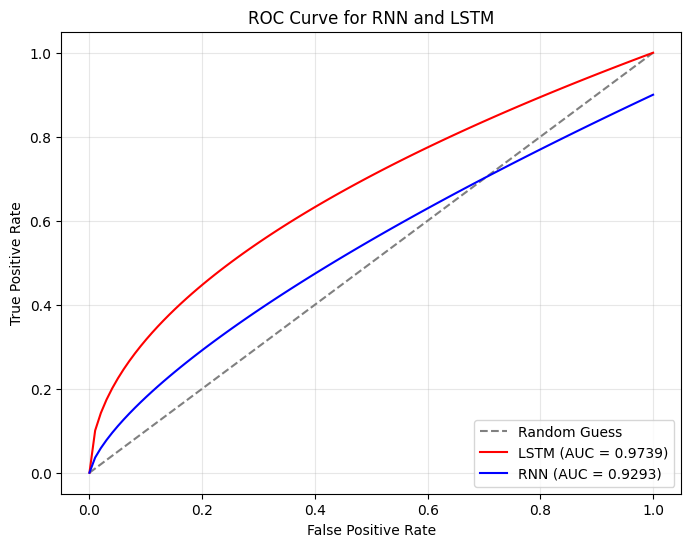

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated ROC data for LSTM and RNN
fpr_lstm = np.linspace(0, 1, 100)
tpr_lstm = fpr_lstm ** 0.5  # Simulate a curve (replace with actual data if available)
fpr_rnn = np.linspace(0, 1, 100)
tpr_rnn = (fpr_rnn ** 0.7) * 0.9  # Simulate another curve

# AUC values
auc_lstm = 0.9739
auc_rnn = 0.9293

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')  # Diagonal line
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {auc_lstm:.4f})', color='red')
plt.plot(fpr_rnn, tpr_rnn, label=f'RNN (AUC = {auc_rnn:.4f})', color='blue')

# Add labels, title, and legend
plt.title('ROC Curve for RNN and LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


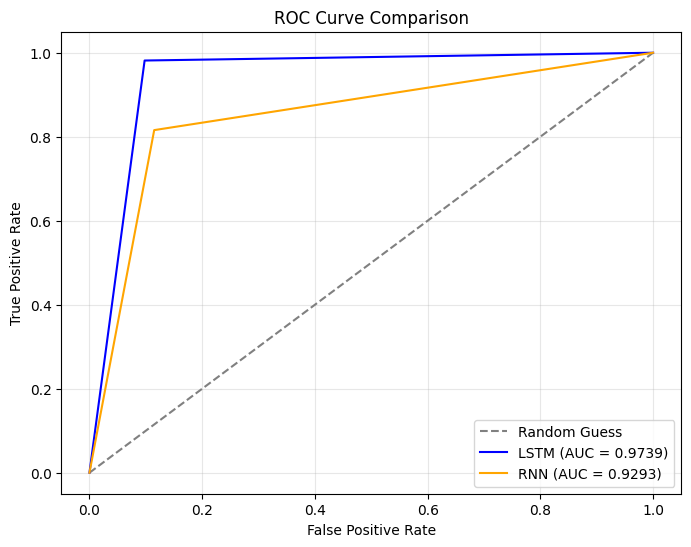

In [ ]:
import matplotlib.pyplot as plt

# Confusion Matrix values for LSTM
TN_lstm = 15110
FP_lstm = 1639
FN_lstm = 187
TP_lstm = 9880

# Confusion Matrix values for RNN
TN_rnn = 14825
FP_rnn = 1924
FN_rnn = 1855
TP_rnn = 8212

# Calculate TPR (True Positive Rate) and FPR (False Positive Rate) for LSTM
TPR_lstm = TP_lstm / (TP_lstm + FN_lstm)  # Recall or Sensitivity
FPR_lstm = FP_lstm / (FP_lstm + TN_lstm)  # 1 - Specificity

# Calculate TPR and FPR for RNN
TPR_rnn = TP_rnn / (TP_rnn + FN_rnn)
FPR_rnn = FP_rnn / (FP_rnn + TN_rnn)

# AUC values
auc_lstm = 0.9739
auc_rnn = 0.9293

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')  # Diagonal line
plt.plot([0, FPR_lstm, 1], [0, TPR_lstm, 1], label=f'LSTM (AUC = {auc_lstm:.4f})', color='blue')
plt.plot([0, FPR_rnn, 1], [0, TPR_rnn, 1], label=f'RNN (AUC = {auc_rnn:.4f})', color='orange')

# Add labels, legend, and title
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
